# Lexical and syntactic priming

### Set-up

In [1]:
import random
import numpy as np
from copy import deepcopy
from importlib import reload 

import syntactic_wm as cjn ## Our model
reload(cjn)


################
## Parameters ##
################
num_steps = 50 # number of time steps taken by each word input.
head = 1 # number of time steps buffering the front of each sentence.
tail = 20 # number of time steps buffering the end of each sentence.

lambda_cc = 2 # learning rate of short-term synaptic plasticity amongst role neurons.
lambda_cf = 1 # learning rate of short-term synaptic plasticity between role and word neurons.

tau = 0.5 # modifies change in firing rate at each time step to simulate continuous time.

beta = 1 # decay factor of firing rates.

n_word_neurons = 15 # number of word neurons initialised (f)
n_role_neurons = 10 # number of role neurons initialised (c)

gamma = 0.5 # factor dampening connectivity amongst role neurons.

epsilon_cc = 6 # the ceiling of c-c connections when without long-term encoding, while taking into account of negative bias k. 
k_cc = 5 # negative bias, i.e. negative k_cc is the floor of c-c connections.

epsilon_cf = 3 # the ceiling of c-f connections when without long-term encoding, while taking into account of negative bias k. 
k_cf = 1 # negative bias, i.e. negative k_cf is the floor of c-f connections.

h = 2 # normalising factor for inhibition between c-f connections.

W_ff = -0.5  # connectivity amongst word neurons (non-encodable)

unified_noise = 0.5 # noise level if noise is present
cc_noise = True # any noise amongst role neurons
wc_noise = True # any noise between role and word neurons

k_L_cc = 5.7 # long-term encoding amongst role neurons 
k_L_cf = 1.7 # long-term encoding between role and word neurons

# seed that can be changed when running repeats to give rise to average recall accuracy.
# also note that seed will not have an effect on recall unless noise is added to the network.
seed_ = 0 # setting default random seed
np.random.seed(seed_)
random.seed(seed_)

## Lexical and syntactic priming (Comprehension)

In this notebook, we will focus on how the results of lexical and syntactic priming (during comprehension) is attained. <br>
The protocol for each set of priming and target sentences is identical. <br>
Therefore, we present the priming and target sentences of each experiment. Then we present the protocol. <br>
The experiments will correspond to results in Fig.S3 of our manuscript. Each of these experiments were repeated 50 times. <br>
The simulation of Bock's experiment will be found in a separate notebook.

### Simulation 10: Experiment for Fig 4A(i) or Fig.S3A(ii)

In [ ]:
# long term encodings
LT_wc_knowledge = [[0,0],[1,1],[2,2],[3,3],[4,0],[5,1],[6,3]] # long-term encoding between word and role neurons
LT_cc_knowledge = [[0,1,2,3],[0,1,3]] # long-term encoding between role neurons.

# sentence a1 = word0 -> word1 -> word2 -> word3
# sentence b1 = word4 -> word5 -> word6

### Simulation 11: Experiment for Fig 4A(ii-iii) or Fig.S3B(v-vi)

In [ ]:
# long term encodings
LT_wc_knowledge = [[0,0],[1,1],[2,2],[3,3],[4,0],[5,1],[6,4],[7,5],[8,0],[9,1],[10,2],[11,3]] # long-term encoding between word and role neurons
LT_cc_knowledge = [[0,1,2,3],[0,1,4,5]] # long-term encoding between role neurons.

# sentence a1 = word4 -> word5 -> word6 -> word7
# sentence c1 = word0 -> word1 -> word2 -> word3
# sentence c2 = word8 -> word9 -> word10 -> word11

### Experiment for Fig.S3A(i)

In [ ]:
# long term encodings
LT_wc_knowledge = [[0,0],[1,1],[2,2],[3,0],[4,1],[5,2]] # long-term encoding between word and role neurons
LT_cc_knowledge = [[0,1,2]] # long-term encoding between role neurons.

# sentence b1 = word0 -> word1 -> word2
# sentence b2 = word3 -> word4 -> word5

### Experiment for Fig.S3B(i-ii)

In [ ]:
# long term encodings
LT_wc_knowledge = [[0,0],[1,1],[2,2],[3,3],[4,0],[5,1],[6,3],[7,0],[8,1],[9,2],[10,3]] # long-term encoding between word and role neurons
LT_cc_knowledge = [[0,1,2,3],[0,1,3]] # long-term encoding between role neurons.

# sentence a1 = word0 -> word1 -> word2 -> word3
# sentence a2 = word7 -> word8 -> word9 -> word10
# sentence b1 = word4 -> word5 -> word6

### Experiment for Fig.S3B(iii-iv)

In [ ]:
# long term encodings
LT_wc_knowledge = [[0,0],[1,1],[2,3],[3,0],[4,1],[5,2],[6,3],[7,0],[8,1],[9,3]] # long-term encoding between word and role neurons
LT_cc_knowledge = [[0,1,2,3],[0,1,3]] # long-term encoding between role neurons.

# sentence a1 = word3 -> word4 -> word5 -> word6
# sentence b1 = word0 -> word1 -> word2
# sentence b2 = word7 -> word8 -> word9

## Example experiment

We will demonstrate how one repeat of a priming experiment is carried out. <br>
We will use the result from Fig.S3B(v) as example. <br>
The priming sentence we will use is a1 and the target sentence is c2. <br>
Each sentence is encoded over 1 epoch only in this example. <br>
Note in some experiments, the epoch is 2 if the same sentence is repeated twice (e.g. b1b1b2; therefore b1 has epoch = 2)

In [2]:
# long term encodings
LT_wc_knowledge = [[0,0],[1,1],[2,2],[3,3],[4,0],[5,1],[6,4],[7,5],[8,0],[9,1],[10,2],[11,3]] # long-term encoding between word and role neurons
LT_cc_knowledge = [[0,1,2,3],[0,1,4,5]] # long-term encoding between role neurons.

# building the priming sentence
sentence = []
for n in range(head): sentence.append(cjn.in_in())
for n in range(num_steps): sentence.append(cjn.in_in(word=4))
for n in range(num_steps): sentence.append(cjn.in_in(word=5))
for n in range(num_steps): sentence.append(cjn.in_in(word=6))
for n in range(num_steps): sentence.append(cjn.in_in(word=7))
for n in range(tail): sentence.append(cjn.in_in())

## initialising the working memory model
no_periods = 1 # the priming sentence is repeated over 1 epoch
WM_ori = cjn.feature_layer(n_role_neurons = n_role_neurons,
                       cc_connectivity_factor = gamma,
                       activation_decay = beta,
                       LR_c = lambda_cc,
                       LR_w = lambda_cf,
                       cc_max_connection = epsilon_cc - k_cc,
                       cf_max_connection = epsilon_cf - k_cf,
                       n_word_neurons = n_word_neurons,
                       time_factor = tau,
                       LT_wc_knowledge = LT_wc_knowledge,
                       cc_learnt_weight = k_L_cc - k_cc,
                       cf_learnt_weight = k_L_cf - k_cf,
                       input_node_connectivity = W_ff,
                       LT_cc_knowledge = LT_cc_knowledge,
                       cc_floor_weight = -k_cc, 
                       cf_floor_weight = -k_cf,
                       unified_noise = unified_noise,
                       cc_noise = cc_noise,
                       wc_noise = wc_noise,
                       cf_conj_factor = h
                      )


# running the encoding phase
role_neuron_dict, cc_connection_dict, word_neuron_dict, cf_connection_dict, WM_ori, cc_conn_hx, c_act_hx, cf_conn_hx, f_act_hx, cc_long_weights_hx, wc_long_weights_hx, morph_act_hx, wm_conn_hx = cjn.run_model(model=WM_ori, time_steps=len(sentence)*no_periods, sentence=sentence)


********************
Epoch = 1
Number of recorded time steps:  221
********************


In [3]:
# building the target sentence
no_periods = 1 # target sentence is encoded over 1 epoch
sentence = []
for n in range(head): sentence.append(cjn.in_in())
for n in range(num_steps): sentence.append(cjn.in_in(word=8))
for n in range(num_steps): sentence.append(cjn.in_in(word=9))
for n in range(num_steps): sentence.append(cjn.in_in(word=10))
for n in range(num_steps): sentence.append(cjn.in_in(word=11))
for n in range(tail): sentence.append(cjn.in_in())

# encoding the target sentence by re-using the above network
role_neuron_dict, cc_connection_dict, word_neuron_dict, cf_connection_dict, WM_ori, cc_conn_hx, c_act_hx, cf_conn_hx, f_act_hx, cc_long_weights_hx, wc_long_weights_hx, morph_act_hx, wm_conn_hx = cjn.run_model(model=WM_ori, time_steps=len(sentence)*no_periods, sentence=sentence)


********************
Epoch = 1
Number of recorded time steps:  221
********************


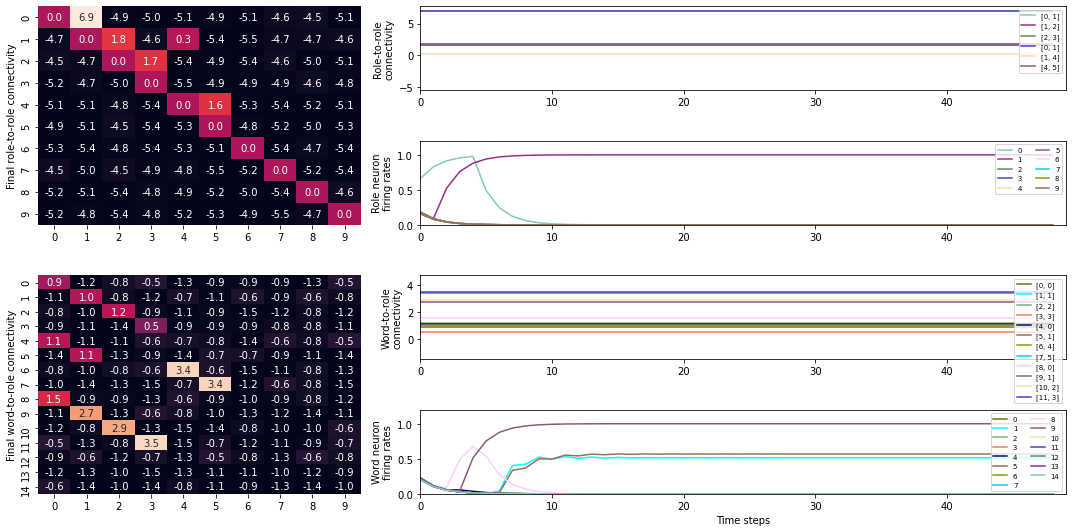

The final recall output is: 
[[8.0], [9.0]]
The response time is: 
5


In [4]:
## Recalling the encoded target sentence
WM_r = deepcopy(WM_ori) # copy the encoded model
initial_steps = 5 # initial 5 steps during recall will have input into the first role neuron
n_steps = 50 # total number of time steps taken during recall

# building recall input with 5 initial time steps with input into the first role neuron and then no further input.
recall_input = []
for n in range(initial_steps): recall_input.append(cjn.in_in(role=0))
for n in range(n_steps-initial_steps): recall_input.append(cjn.in_in())

# running the recall phase
cc_conn_hx_r, c_act_hx_r, cf_conn_hx_r, f_act_hx_r, cc_long_weights_hx_r, wc_long_weights_hx_r, morph_act_hx_r, wm_conn_hx_r = cjn.recall_feat_layer(WM_r,recall_input,n_steps=n_steps,initial_steps=initial_steps)

# visualise the recall
cjn.plot_results(recall_input, epsilon_cc-k_cc+k_L_cc, -k_cc, epsilon_cf-k_cf+k_L_cf, -k_cf, LT_cc_knowledge, LT_wc_knowledge, cc_conn_hx_r, cf_conn_hx_r, c_act_hx_r, f_act_hx_r)

# Final recall determined by argmax at each time step
print('The final recall output is: ')
print(cjn.argmax_sentence(f_act_hx_r))
print('The response time is: ')
print(cjn.get_response_time(f_act_hx_r))

Note that the imperfect recall is due to noise introduced during set-up. <br>
Response time is the time step at which the final recalled word reaches argmax.